<a href="https://colab.research.google.com/github/PhuongTa/hocmay/blob/main/Ch%C6%B0%C6%A1ng_3_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kết Nối + Tải Dữ Liệu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# IMPORT LIBRARIES
import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# to make output stable across runs
random_state = 42


# Where to save figure
PROJECT_ROOT_DIR = "drive/MyDrive/HOCMAY/working/"
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#SOURCE_PATH = 'datasets/mnist'

In [4]:
IMAGES_PATH

'drive/MyDrive/HOCMAY/working/images/classification'

In [5]:
# Function to save figure
def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure... " + fig_id)
  if tight_layout:
    plt.tight_layout()

  plt.savefig(path, format=fig_extension, dpi=resolution)



#MNIST version 1.0

**Lưu ý:** từ Scikit-Learn 0.24, theo mặc định thì `fetch_openml()` sẽ trả về một `DataFrame` của Pandas.

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

* data chứa một mảng hai chiều, mỗi hàng ứng với một mẫu dữ liệu và mỗi cột ứng với một đặc trưng
* target chứa một mảng các nhãn

In [7]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

MNIST chứa `70,000 ảnh` với `784 đặc trưng` trên từng ảnh.
* Lí do là mỗi ảnh chứa `28×28 điểm ảnh`, và mỗi đặc trưng đại diện cho cường độ của một điểm ảnh với giá trị nằm trong khoảng `từ 0 (trắng) đến 255 (đen)`.

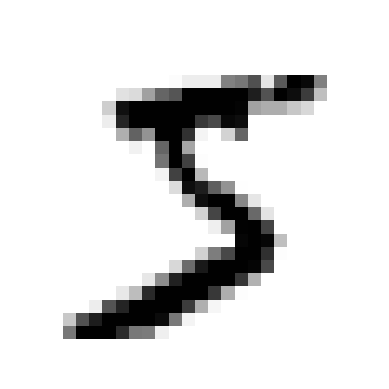

In [10]:
# Kiểm tra mẫu đầu tiên
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap= "binary")
plt.axis("off")
plt.show()

In [11]:
y[0]

'5'

Các nhãn `(labels)` đang được `lưu trữ dưới dạng dữ liệu chuỗi`, Ta cần `chuyển sang dữ liệu số`.

In [12]:
y = y.astype(np.uint8)
y[0]

5

In [13]:
# Plot_digit
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap = mpl.cm.binary,
             interpolation="nearest")
  plt.axis("off")

In [14]:
# plot_digit (extra)
def plot_digit(instances, images_per_row=10, **options):
  # shape(28,28)
  size = 28

  # đảm bảo image_per_row không vượt quá số lượng instances
  images_per_row = min(len(instances), images_per_row)

  # reshape all images in instances
  images = [instance.reshape(size, size) for instance in instances]

  # Tính số hàng cần thiết để hiển thị tất cả hình ảnh.
  n_row_indeed = (len(instances) - 1) // images_per_row + 1
                   # (98 - 1 // 10) + 1 = 10

  # danh sách images hiển thị
  row_images = []

  # Tính số lượng hình trống cần thêm vào để đâỳ lưới
  n_image_empty = n_row_indeed * images_per_row - len(instances)
                  # 10 * 10 - 98 = 2 (ô trống)

  # Thêm các hình ảnh rỗng vào cuối danh sách để điền đầy các ô trống.
  images.append(np.zeros((size, size * n_image_empty)))

  for row in range(n_row_indeed):
    # Lấy ra một hàng hình ảnh từ danh sách images.
    rimages = images[row * images_per_row : (row + 1) * images_per_row]

    # Kết hợp các hình ảnh trong hàng lại thành một hình ảnh lớn và thêm nó vào row_images.
    row_images.append(np.concatenate(rimages, axis=1))

  # Kết hợp các hàng hình ảnh lại thành một hình ảnh lớn.
  image = np.concatenate(row_images, axis=0)

  plt.imshow(image, cmap=mpl.cm.binary, **options)
  plt.axis("off")

Saving figure... more_digits_plot


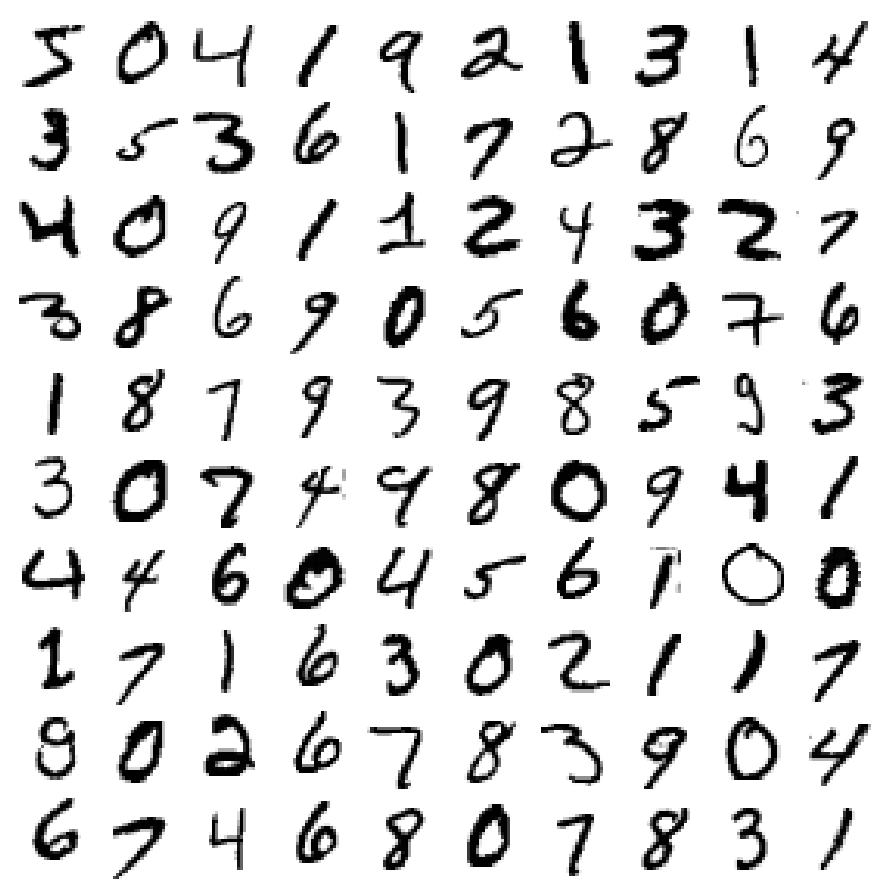

In [15]:
# print first - 100 numbers
plt.figure(figsize = (9,9))
example_images = X[:100]
plot_digit(example_images, images_per_row = 10)

save_fig("more_digits_plot")
plt.show()

Theo `mnist["DESCR"]`: It can be split in a **`training set`** of the first **`60,000 examples`**, and a **`test set`** of `10,000 examples`

In [16]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

Ta cần đảm bảo tất cả các fold trong kiểm định chéo sẽ tương tự (không thiếu vài chữ số), và một số thuật toán nhạy cảm với thứ tự mẫu huấn luyện và sẽ hoạt động kém nếu liên tục nhận được nhiều mẫu có cùng nhãn => nên ta sẽ xáo trộn tập huấn luyện.

Tuy nhiên, *TẬP HUẤN LUYỆN ĐÃ ĐƯỢC XÁO TRỘN SẴN.*

# HUẤN LUYỆN BỘ PHÂN LOẠI NHỊ PHÂN (BINARY CLASSIFICATION)

Bài toán: `Bộ nhận diện số 5
- Xác định một chữ số
- Chỉ phân biệt giữa hai lớp 5 và không 5

In [17]:
y_train_5 =(y_train == 5) # True với tất cả là 5, False với các số khác
y_test_5 = (y_test == 5)

## Mô hình `(SGD)` Hạ Gradient Ngẫu nhiên (Stochastic Gradient Descent).

Ưu điểm là khả năng xử lý tập dữ liệu rất lớn hiệu quả.

- Huấn luyện từng mẫu dữ liệu độc lập
- Thích hợp cho học trực tuyến.

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42) #max_iter=1000, tol=1e-3 #default
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

## Sử dụng cross_val_score của sklearn

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Ta đạt được độ chính xác 95% trên tất cả các fold kiểm định chéo??? - có nên vui mừng?
- **Ta cần kiểm tra thêm**

Hãy xem thử độ chính xác của một bộ phân loại cực kỳ đơn giản là `gán cho tất cả các ảnh cùng một nhãn “không phải 5”`

In [21]:
from sklearn.base import BaseEstimator

class Never5Classier(BaseEstimator):
  def fit(self, X, y=None):
    """
    Phương thức không thực hiện bất kỳ việc đào tạo nào và chỉ đơn giản trả về chính bản thân đối tượng.
    Điều này phản ánh ý nghĩa của mô hình này: không cần đào tạo, vì nó luôn luôn dự đoán sai
    """
    return self

  def predict(self, X):
    # Trả về giá trị toàn False vì luôn dự đoán không phải là 5.
    return np.zeros((len(X), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring= "accuracy")

array([0.91125, 0.90855, 0.90915])

* Mô hình này có độ chính xác  trên 90%. **WOW!!!** - Đừng vội mừng

* Điều này xảy ra là do chỉ có khoảng 10% số ảnh 5.
* Nếu luôn dự đoán một ảnh `không phải 5`, ta sẽ đúng khoảng **90%** số lần.

Điều này chứng mình `Accuracy` không phải phép đo chất lượng cho các bộ phân loại `classifier`, đặc biệt là khi ta đang làm việc với tập dữ liệu lệch `Skewed dataset` tức là khi một vài lớp có nhiều dữ liệu hơn các lớp khác.

## Hàm đánh giá sử dụng StratifiedKFold
- Có chức năng tương tự Cross_val_score.

Lớp `StratifiedKFold` thực hiện `lấy mẫu stratified` để tạo ra các fold chứa tỉ lệ đại diện của mỗi lớp. Tại mỗi vòng lặp, đoạn mã tạo một bản sao của bộ phân loại, huấn luyện bản sao đó trên các fold huấn luyện và dự đoán trên fold kiểm tra, rồi sau đó đếm số lượng và tính tỉ lệ dự đoán đúng.

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle= True, random_state=42)
scores = []
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)

  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  scores.append(n_correct / len(y_pred))

print(scores)

[0.9669, 0.91625, 0.96785]


## Ma trận nhầm lẫn (Confusion matrix)

In [24]:
from sklearn.model_selection import cross_val_predict

#cross_val_predict() thực hiện kiểm định chéo K-fold,
# nhưng hàm này trả về các dự đoán trên mỗi fold kiểm tra thay vì điểm số đánh giá.

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

```
                                  Dự đoán
    Thực tế          |   Âm tính     |      Dương tính
---------------------------------------------------------                       
                     |  True-Neg.    |     False-Pos.
(`!5`) Âm tính       |   53892      |       687
---------------------------------------------------------
                     |  False-Neg    |      True-Pos
(`5`)  Dương tính    |   1891       |       3530
                                                          ^
                                                          | Precision
                                                <- Recall
```

- Phép đo độ chính xác của các dự đoán cho lớp dương (precision)
  ```
  precision = TP / (TP + FP)
  ```
  
  - TP: mẫu dương tính thật.
  - FP: mẫu dương tính giả

- Độ nhạy (Sensitivity) hoặc tỷ lệ dương tính thật (`true positive rate - TPR)`: là tỷ lệ mẫu dương được phát hiện đúng bởi bộ phân loại.
  ```
  recall = TP / (TP + FN)
  ```
  FN: mẫu âm tính giả


In [26]:
y_train_perfect_predictions = y_train_5 # gỉả sử chúng ta đạt được sự hoàn hảo.
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [27]:
from sklearn.metrics import precision_score, recall_score
print("Độ chính xác: ", precision_score(y_train_5, y_train_pred)) # 3530 / (3530 + 687)

print("Độ nhạy: ", recall_score(y_train_5, y_train_pred)) # 3530 / (3530 + 1891)


Độ chính xác:  0.8370879772350012
Độ nhạy:  0.6511713705958311


- Trong tổng số lần bộ phân loại: gán nhãn `một ảnh là 5`, nó chỉ đúng `precision: 83.7%` số lần.
- Trên tổng `số ảnh số 5`, nó chỉ phát hiện được `recall: 65.1%` số ảnh.

### F-Score
- trung bình điều hoà của recall và precision.
- Một bộ phân loại chỉ có thể đạt được `chỉ số F1 cao` nếu `cả presion và recall đều cao`
```
    F1 = 2 X (precision x recall) / (precision + recall)
```    
    hoặc
```    
    F1 = TP / (TP + (FN + FP)/2)
```


In [28]:
from sklearn.metrics import f1_score

f1_scr = f1_score(y_train_5, y_train_pred)
print("f1_score: ", f1_scr)

f1_score:  0.7325171197343846


## Precision/Recall Trade off

In [29]:
# Sử dụng decision_function() thay predict(). Trả về số điểm của mỗi mẫu
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
threshold = 0 # Sử dụng ngưỡng 0 cùng phương thức predict.
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [31]:
threshold = 9000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Kết quả này xác nhận rằng tăng mức ngưỡng sẽ làm giảm recall. Bức ảnh được kiểm tra là chữ số 5, bộ phân loại đã dự đoán đúng khi mức ngưỡng bằng 0, nhưng lại thất bại khi mức ngưỡng tăng lên 9,000.

### Làm sao xác định ngưỡng phù hợp?
- Sử dụng cross_val_predict() dự đoán các mẫu trong tập huấn luyện nhưng trả về điểm quyết định thay vì dự đoán.

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                             cv=3, method ="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure... precision_recall_vs_threshold_plot


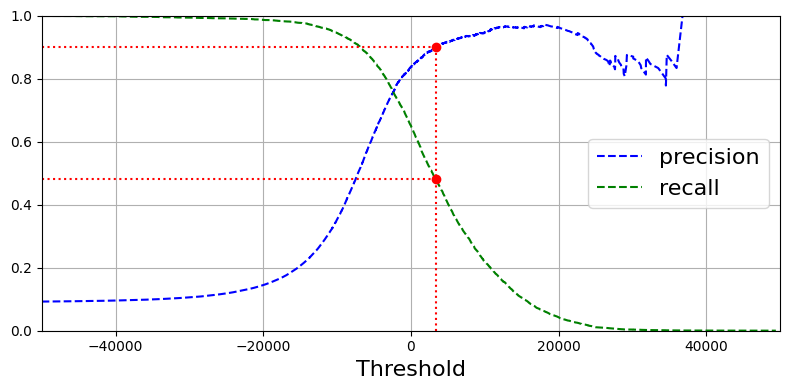

In [37]:
# Vẽ đồ thị của precision và recall theo threshold

def plot_precision_recall_vs_threshold(preicions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1],"g--", label="recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000, 0, 1])

recall_90_precision= recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]


plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()


In [38]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure... precision_vs_recall_plot


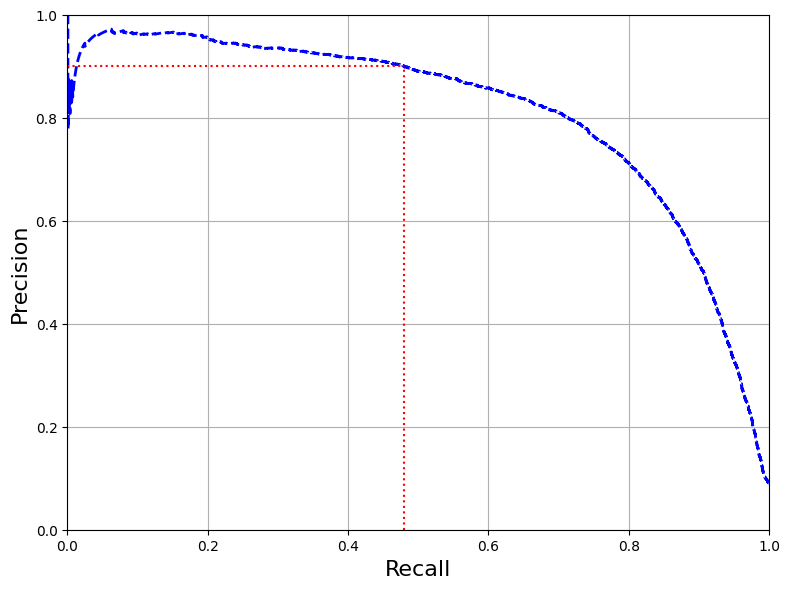

In [39]:
# Vẽ đồ thị precision_recall

def plot_precision_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)

plt.figure(figsize=(8,6))
plot_precision_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0.,0.9],"r:")
plt.plot([0.0, recall_90_precision],[0.9,0.9], "r:")
save_fig("precision_vs_recall_plot")
plt.show()


- Có thể thấy `Precision` bắt đầu giảm nhanh ở khoảng `Recall 80%`.
- Ta có thể chọn 1 mức `Precision/Recall Trade off` ở trước đó. VD: 60% - tuỳ thuộc vào dự án cụ thể

In [40]:
# np.argmax() cho ta chỉ số đầu tiên của giá trị lớn nhất
# (giá trị True đầu tiên trong trường hợp này)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] #~3370
threshold_90_precision

3370.0194991439557

In [41]:
y_train_pred_90=(y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [42]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [43]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Tìm mức recall ở Precision 60%

In [48]:
threshold_60_precision = thresholds[np.argmax(precisions >= 0.60)]
threshold_60_precision

-5411.202076230331

In [49]:
y_train_pred_60 = (y_scores >= threshold_60_precision)
y_train_pred_60

array([ True, False, False, ...,  True, False, False])

In [50]:
precision_score(y_train_5, y_train_pred_60)

0.6000255819902789

In [51]:
recall_score(y_train_5, y_train_pred_60)

0.8653384984320236

## Đường Cong ROC (Receiver Operating Characteristic)

- Vẽ tỷ lệ dương tính thật `(True Positive Rate TPR - recall)` theo tỷ lệ dương tính giả `(False Positive Rate - FPR)`

- **FPR**: là tỷ lệ các mẫu âm tính bị phân loại sai thành dương tính và bằng 1.
- **TNR**: là tỷ lệ các mẫu âm tính được phân loại đúng. `(specificity)`

- Do đó, ROC là biểu đồ thể hiện `sensitivity - recall` theo `1 - specificity`

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

Saving figure... roc_curve_plot


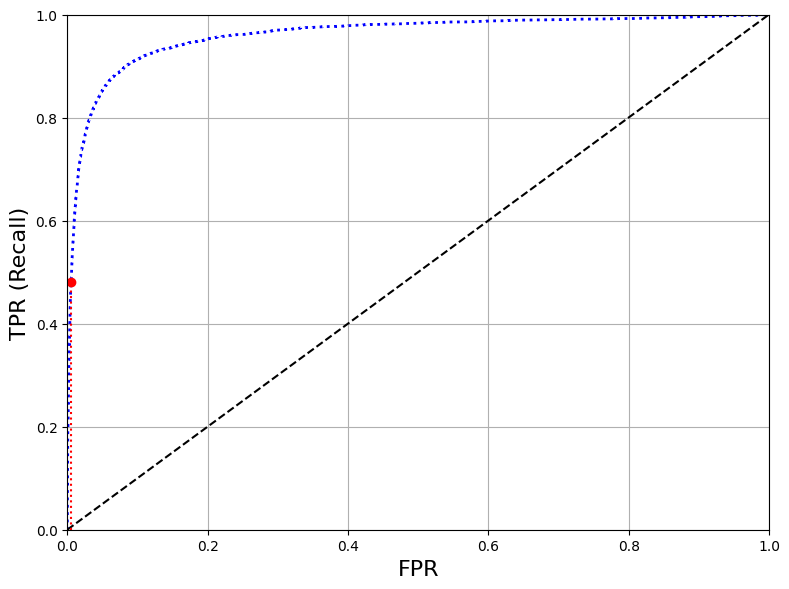

In [72]:
def plot_roc_curve(fpr, tpr, color="b:", label=None):
    plt.plot(fpr, tpr, f"{color}",linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("FPR", fontsize=16)
    plt.ylabel("TPR (Recall)", fontsize=16)
    plt.grid(True)


plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90],[0., recall_90_precision],"r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90],[recall_90_precision],"ro")
save_fig("roc_curve_plot")
plt.show()



Đường cong ROC vẽ tỷ lệ FPR theo tỷ lệ TPR cho tất cả các mức ngưỡng khả dĩ. Hình tròn đỏ đánh dấu mức ngưỡng được chọn `(có recall 43.68%)`

## Chú ý:
👉 Vì `ROC curve` rất giống với `Precision/Recall (PR) ` vậy ta sẽ sử dụng đường cong nào?

- `Chọn đường PR` khi nào `số lượng mẫu dương ít` / `bạn quan tâm đến dương tính giả  (PN) hơn là âm tính giả (FN)`.
- Không thì `sử dụng đường ROC`.

👉 - Sau khi quan sát đường cong ROC ở phía trên và điểm ROC-AUC ta có thể nghĩ bộ phân loại này rất tốt.

👉 - Nhưng điều này phần lớn là vì ta có ít mẫu dương (hình ảnh số 5) hơn các số mẫu âm (không phải 5).

👉 - Ngược lại, từ đường cong PR ta có thể thấy rõ rằng bộ phân loại này vẫn có thể được cải thiện. Đường cong có thể gần góc trên bên phải hơn nữa.)

## AUC (Area under the curve)

- Một bộ phân loại `hoàn hảo sẽ có ROC AUC = 1`
- Một bộ phân loại `ngẫu nhiên sẽ có ROC AUC = 0.5`

In [56]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## So sánh RandomForestClassifier / SGDClassifier / LogisticRegression

- `RandomForestClassifier` / `LogisticRegression` không có phương thức `desision_function()` chỉ có `predict_proba()`

In [57]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                   cv=3,
                                   method="predict_proba")

In [78]:
y_scores_forest= y_proba_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_score_forest)

Saving figure... roc_curve_comparison_plot


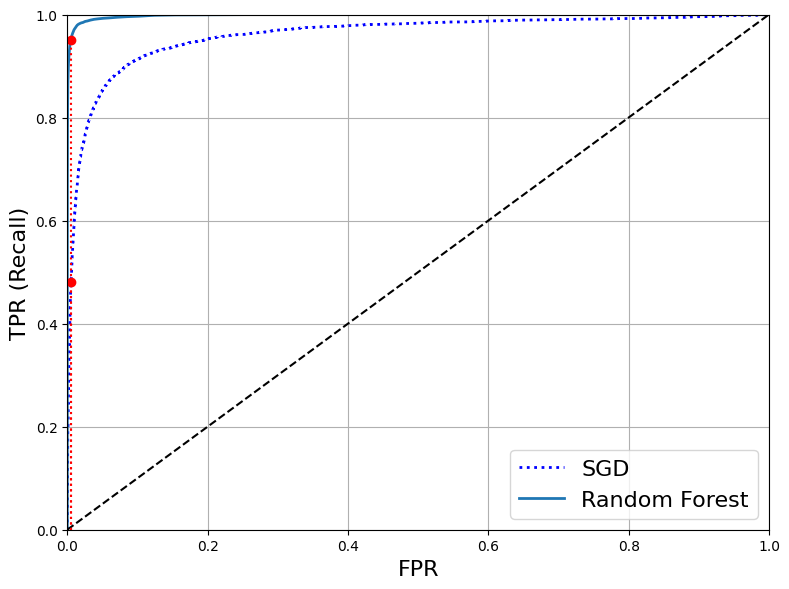

In [63]:
recall_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_forest], "r:")
plt.plot([fpr_90], [recall_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

logist_reg = LogisticRegression(random_state=42)
y_proba_logist= cross_val_predict(logist_reg, X_train, y_train_5,
                                  cv=3,
                                  method="predict_proba")

In [79]:
y_scores_logist= y_proba_logist[:,1] # score = proba of positive class
fpr_logist, tpr_logist, threshold_logist = roc_curve(y_train_5, y_score_logist)

Saving figure... roc_curve_comparison_rand_SGD_Logist_plot


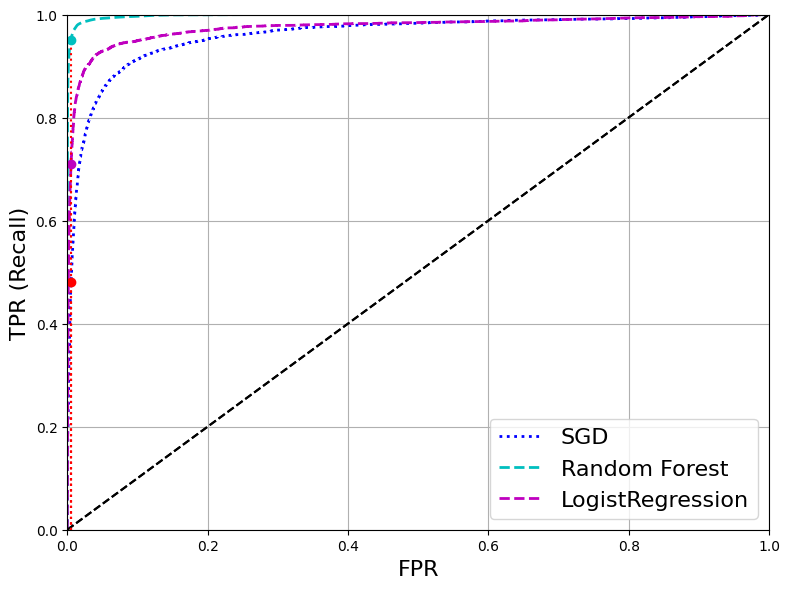

In [77]:
recall_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]
recall_logist = tpr_logist[np.argmax(fpr_logist >= fpr_90)]

plt.figure(figsize=(8, 6))
# plot
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

plot_roc_curve(fpr_forest, tpr_forest,"c--", "Random Forest")
plot_roc_curve(fpr_logist, tpr_logist, "m--","LogistRegression")

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") # r:red
plt.plot([fpr_90], [recall_90_precision], "ro")

# RandomForest
plt.plot([fpr_90, fpr_90], [0., recall_forest], "r:") # c: cyan
plt.plot([fpr_90], [recall_forest], "co")

# LogistRegression
plt.plot([fpr_90, fpr_90], [0., recall_logist], "r:") #m:magenta
plt.plot([fpr_90], [recall_logist], "mo")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_rand_SGD_Logist_plot")
plt.show()

In [86]:
# function print score ROC AUC score of models

def print_roc_auc_score(y_scores, name_classifier=None):
    print(f"ROC AUC {name_classifier}:\t",roc_auc_score(y_train_5,y_scores))


In [88]:
# ROC AUC RandomForest
print_roc_auc_score(y_scores_forest,"RandomForestClassifier")
# ROC AUC LogisticRegression
print_roc_auc_score(y_scores_logist,"LogisticRegression")
# ROC AUC SGD
print_roc_auc_score(y_scores,"SGDClassifier")

ROC AUC RandomForestClassifier:	 0.9983436731328145
ROC AUC LogisticRegression:	 0.9748673009805543
ROC AUC SGDClassifier:	 0.9604938554008616


👉 Như có thể thấy `đường cong ROC RandomForestClassifier` tốt hơn nhiều so với `SGDClassifier` và `LogisticRegression`: nó gần góc trái hơn do đó điểm `ROC AUC RandomForestClassifier cao nhất.`

### Tính điểm Precision/ Recall của RandomForestClassifier.

In [83]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
# Precision Score
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [84]:
# Recall Score
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591